In [1]:
# import essential libraries
import numpy as np
import pandas as pd
import gzip

## Export to CSV

### 10 Features - 1 Label

We'll only keep 

**10 Features:**
* age
* sex
* height
* weight
* heart_axis
* validated_by
* second_opinion
* validated_by_human
* pacemaker
* strat_fold

**1 Label:**
* ritmi

We'll specifically drop missing values for the height and weight columns. Then we'll fill the missing values for the age column with the mean values. For the other columns, we'll fill in the missing values with either 0 or 'missing'. Therefore, we'll end up having 1803 data points with 10 features and 1 label, then export to csv file.

In [4]:
# read in csv
df = pd.read_csv('data/coorteeqsrafva.csv', sep=';', header=0, index_col=0)
df.head()

,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,nurse,site,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,STACH,10900,VA,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
1,AFLT,10900,AF,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
2,SR,8209,SR,12281.0,55.0,0,NaN,NaN,1.0,2.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/08000/08209_lr,records500/08000/08209_hr
3,STACH,17620,VA,2007.0,29.0,1,164.0,56.0,7.0,1.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/17000/17620_lr,records500/17000/17620_hr
4,SBRAD,12967,VA,8685.0,57.0,0,NaN,NaN,0.0,0.0,...,False,NaN,", I-AVR,",NaN,NaN,NaN,NaN,1,records100/12000/12967_lr,records500/12000/12967_hr


In [19]:
# drop columns
sub_df = df.drop(columns=['diagnosi', 'ecg_id', 'patient_id', 'nurse', 'site', 'device', 'recording_date', 'report', 'scp_codes', 'infarction_stadium1', 'infarction_stadium2', 'initial_autogenerated_report', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'filename_lr', 'filename_hr'])
sub_df.tail()

,ritmi,age,sex,height,weight,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
6423,VA,81.0,0,178.0,70.0,LAD,0.0,False,True,NaN,4
6424,VA,88.0,0,152.0,45.0,NaN,0.0,False,True,NaN,10
6425,SR,83.0,1,NaN,NaN,LAD,1.0,False,True,NaN,5
6426,AF,75.0,1,177.0,80.0,NaN,2.0,False,True,NaN,7
6427,SR,27.0,0,NaN,NaN,MID,1.0,False,True,NaN,8


In [20]:
# get info for columns
sub_df.isnull().sum()

ritmi                    0
age                     34
sex                      0
height                4562
weight                4000
heart_axis            2304
validated_by          2752
second_opinion           0
validated_by_human       0
pacemaker             6134
strat_fold               0
dtype: int64

In [21]:
# drop missing values for height and weight
sub_df = sub_df[sub_df['height'].notna()]
sub_df = sub_df[sub_df['weight'].notna()]

# fill missing values for age with the mean
sub_df['age'].fillna((sub_df['age'].mean()), inplace=True)

# fill missing values for validated_by with 0 
# (assuminng not validated by human)
sub_df['validated_by'] = sub_df['validated_by'].fillna(0)

# fill missing values for heart_axis with missing
# (assuminng heart axis is missing)
sub_df['heart_axis'] = sub_df['heart_axis'].fillna('Missing')

# fill missing values for pacemaker with missing 
# (assuminng pacemaker is missing)
sub_df['pacemaker'] = sub_df['pacemaker'].fillna('Missing')

In [22]:
# get info for columns
sub_df.isnull().sum()

ritmi                 0
age                   0
sex                   0
height                0
weight                0
heart_axis            0
validated_by          0
second_opinion        0
validated_by_human    0
pacemaker             0
strat_fold            0
dtype: int64

In [23]:
# map categorical values to numerical values
sub_df['ritmi'] = sub_df['ritmi'].map({'SR': 0, 'AF': 1, 'VA': 2}).values
sub_df['second_opinion'] = sub_df['second_opinion'].map({False: 0, True:1}).values
sub_df['validated_by_human'] = sub_df['validated_by_human'].map({False: 0, True:1}).values
sub_df['heart_axis'] = sub_df['heart_axis'].map({'Missing':0, 'LAD':1, 'AXL':2, 'MID':3, 'RAD':4, 'ALAD':5, 'AXR':6}).values
sub_df['pacemaker'] = sub_df['pacemaker'].map({'Missing':0, 'PACE????, nan': 0, '?, nan':0, 'ja, pacemaker':1}).values

# reset index
sub_df = sub_df.reset_index(drop=True)
sub_df

,ritmi,age,sex,height,weight,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
0,2,29.0,1,164.0,56.0,0,0.0,0,1,0,1
1,0,59.0,0,156.0,75.0,0,0.0,0,1,0,9
2,2,84.0,1,152.0,51.0,0,0.0,0,1,0,7
3,0,79.0,0,172.0,66.0,0,0.0,0,1,0,5
4,1,67.0,0,178.0,73.0,4,0.0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...
1798,0,76.0,0,166.0,67.0,0,0.0,0,1,0,4
1799,2,78.0,1,176.0,76.0,1,4.0,0,1,0,1
1800,2,81.0,0,178.0,70.0,1,0.0,0,1,0,4
1801,2,88.0,0,152.0,45.0,0,0.0,0,1,0,10


In [24]:
# export to csv
sub_df.to_csv('data/training_11_features.csv', index=False)

### 13 Features - 1 Label

We'll only keep 

**13 Features:**
* age
* sex
* height
* weight
* nurse
* site
* device
* heart_axis
* validated_by
* second_opinion
* validated_by_human
* pacemaker
* strat_fold

**1 Label:** 
* ritmi

We'll specifically fill missing values with the mean values for the age, height, weight columns. In addition, we'll also fill missing values with 0 for the nurse, site, validated_by, heart_axis, and pacemaker columns. Therefore, we'll end up having 6366 data points with 13 features and 1 label, then export to csv file.

In [27]:
# read in csv file
df = pd.read_csv('data/coorteeqsrafva.csv', sep=';', header=0, index_col=0)
df.tail()

,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,nurse,site,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
6423,SARRH,4131,VA,3829.0,81.0,0,178.0,70.0,11.0,1.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/04000/04131_lr,records500/04000/04131_hr
6424,STACH,18644,VA,3866.0,88.0,0,152.0,45.0,11.0,1.0,...,True,"v3,",NaN,NaN,NaN,2ES,NaN,10,records100/18000/18644_lr,records500/18000/18644_hr
6425,SR,3693,SR,17345.0,83.0,1,NaN,NaN,1.0,2.0,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,5,records100/03000/03693_lr,records500/03000/03693_hr
6426,AFIB,1039,AF,6038.0,75.0,1,177.0,80.0,NaN,34.0,...,True,NaN,NaN,NaN,NaN,2ES,NaN,7,records100/01000/01039_lr,records500/01000/01039_hr
6427,SR,15097,SR,14746.0,27.0,0,NaN,NaN,1.0,2.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/15000/15097_lr,records500/15000/15097_hr


In [28]:
# drop columns
sub_df = df.drop(columns=['diagnosi', 'ecg_id', 'patient_id', 'recording_date', 'report', 'scp_codes', 'infarction_stadium1', 'infarction_stadium2', 'initial_autogenerated_report', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'filename_lr', 'filename_hr'])
sub_df.tail()

,ritmi,age,sex,height,weight,nurse,site,device,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
6423,VA,81.0,0,178.0,70.0,11.0,1.0,AT-6 6,LAD,0.0,False,True,NaN,4
6424,VA,88.0,0,152.0,45.0,11.0,1.0,AT-6 6,NaN,0.0,False,True,NaN,10
6425,SR,83.0,1,NaN,NaN,1.0,2.0,CS-12,LAD,1.0,False,True,NaN,5
6426,AF,75.0,1,177.0,80.0,NaN,34.0,AT-6 C 5.5,NaN,2.0,False,True,NaN,7
6427,SR,27.0,0,NaN,NaN,1.0,2.0,CS-12,MID,1.0,False,True,NaN,8


In [29]:
# fill missing values with mean values for the age, height, weight columns
sub_df['age'].fillna(value=sub_df['age'].mean(), inplace=True)
sub_df['height'].fillna(value=sub_df['height'].mean(), inplace=True)
sub_df['weight'].fillna(value=sub_df['weight'].mean(), inplace=True)

# fill missing values with 0 for these columns
sub_df['nurse'] = sub_df['nurse'].fillna(0)
sub_df['site'] = sub_df['site'].fillna(0)
sub_df['validated_by'] = sub_df['validated_by'].fillna(0)
sub_df['heart_axis'] = sub_df['heart_axis'].fillna('Missing')
sub_df['pacemaker'] = sub_df['pacemaker'].fillna('Missing')

In [30]:
# map categorical values to numerical values
sub_df['ritmi'] = sub_df['ritmi'].map({'SR': 0, 'AF': 1, 'VA': 2}).values
sub_df['second_opinion'] = sub_df['second_opinion'].map({False: 0, True:1}).values
sub_df['validated_by_human'] = sub_df['validated_by_human'].map({False: 0, True:1}).values
sub_df['heart_axis'] = sub_df['heart_axis'].map({'Missing':0, 'LAD':1, 'AXL':2, 'MID':3, 'RAD':4, 'ALAD':5, 'AXR':6}).values
sub_df['pacemaker'] = sub_df['pacemaker'].map({'Missing':0, 'PACE????, nan': 0, '?, nan':0, 'ja, pacemaker':1}).values
sub_df['device'] = sub_df['device'].map({'CS100    3':0, 'CS-12': 1, 'AT-6 C 5.5':2, 'CS-12   E':3, 'AT-6     6':4, 'AT-60    3':5, 'AT-6 C 5.8':6, 'AT-6 C':7, 'AT-6 C 5.0':8, 'AT-6 C 5.3':9, 'AT-6 C 5.6':10}).values

In [32]:
# check sub_df
print(sub_df.shape)
sub_df.tail()

(6428, 14)


,ritmi,age,sex,height,weight,nurse,site,device,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
6423,2,81.0,0,178.000000,70.000000,11.0,1.0,4,1.0,0.0,0,1,0.0,4
6424,2,88.0,0,152.000000,45.000000,11.0,1.0,4,0.0,0.0,0,1,0.0,10
6425,0,83.0,1,166.796356,69.841845,1.0,2.0,1,1.0,1.0,0,1,0.0,5
6426,1,75.0,1,177.000000,80.000000,0.0,34.0,2,0.0,2.0,0,1,0.0,7
6427,0,27.0,0,166.796356,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8


In [33]:
# export to csv
sub_df.to_csv('data/training_13_features.csv', index=False)

### Compress 3D Numpy Array Features

Since the numpy data file is too large, we'll try to reduce the size of it.

In [35]:
# compress numpy array file and export
f = gzip.GzipFile("data/compressed_npy.gz", "w")
ecg_arr = np.load('data/ecgeq-500hzsrfava.npy')
np.save(file=f, arr=ecg_arr)
f.close()

### 3D Numpy Arr to CSV

After reading in the compressed numpy data file, we will only get 6428 layers, 700 rows, and 12 columns to reduce the size of the numpy data. After that, we will transform the 3D array to 2D array and then convert it to a dataframe. The converted dataframe has 4361843 rows and 13 columns (12 leads and 1 index column). Afterwards, we will read in the csv file created above, which consists of 13 features. We use this dataframe to merge with the converted dataframe to get 13 more features. As a result, we have a total of 25 features and 1 label. The final dataframe will have 4319176 rows and 26 columns. 

**25 Features:**
* I
* II
* III
* aVF
* aVR
* aVL
* V1
* V2
* V3
* V4
* V5
* V6
* age
* sex
* height
* weight
* nurse
* site
* device
* heart_axis
* validated_by
* second_opinion
* validated_by_human
* pacemaker
* strat_fold

**1 Label:**
* ritmi

In [2]:
# read in the compressed numpy file
f = gzip.GzipFile('data/compressed_npy.gz', "r")
X = np.load(f)

# get 6428 layers, 700 rows and 12 columns
X = X[:,:700,:]
X.shape

(6428, 700, 12)

In [40]:
X

array([[[-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        ...,
        [-0.097, -0.229, -0.132, ..., -0.079, -0.1  , -0.111],
        [-0.104, -0.25 , -0.145, ..., -0.065, -0.084, -0.102],
        [-0.111, -0.271, -0.161, ..., -0.057, -0.079, -0.099]],

       [[-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
        ...,
        [-0.097, -0.229, -0.132, ..., -0.079, -0.1  , -0.111],
        [-0.104, -0.25 , -0.145, ..., -0.065, -0.084, -0.102],
        [-0.111, -0.271, -0.161, ..., -0.057, -0.079, -0.099]],

       [[-0.17 , -0.13 ,  0.04 , ..., -0.14 , -0.05 , -0.03 ],
        [-0.17 , -0.13 ,  0.04 , ..., -0.14 , -0.05 , -0.03 ],
        [-0.17 , -0.13 ,  0.04 , ..., -0.14 , -0.05 , -0.03 ],
        ...,
        [-0.

In [39]:
X.reshape(m*n,-1)

array([[-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
       [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
       [-0.005,  0.135,  0.14 , ..., -0.21 , -0.145, -0.08 ],
       ...,
       [ 0.016,  0.176,  0.16 , ...,  0.04 , -0.052, -0.055],
       [ 0.014,  0.174,  0.16 , ...,  0.059, -0.046, -0.053],
       [ 0.016,  0.176,  0.16 , ...,  0.072, -0.039, -0.05 ]])

In [3]:
# convert 3d array to 2d array and convert it to a dataframe
m,n,r = X.shape
out_arr = np.column_stack((np.repeat(np.arange(m),n),X.reshape(m*n,-1)))
out_df = pd.DataFrame(out_arr)

In [4]:
out_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,-0.005,0.135,0.14,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.210,-0.145,-0.080
1,0.0,-0.005,0.135,0.14,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.210,-0.145,-0.080
2,0.0,-0.005,0.135,0.14,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.210,-0.145,-0.080
3,0.0,-0.005,0.135,0.14,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.210,-0.145,-0.080
4,0.0,-0.005,0.135,0.14,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.211,-0.146,-0.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499595,6427.0,0.010,0.170,0.16,-0.090,-0.075,0.165,0.155,0.365,0.230,0.030,-0.065,-0.060
4499596,6427.0,0.014,0.174,0.16,-0.094,-0.073,0.167,0.155,0.368,0.245,0.029,-0.057,-0.056
4499597,6427.0,0.016,0.176,0.16,-0.096,-0.073,0.167,0.155,0.383,0.261,0.040,-0.052,-0.055
4499598,6427.0,0.014,0.174,0.16,-0.094,-0.073,0.167,0.155,0.406,0.282,0.059,-0.046,-0.053


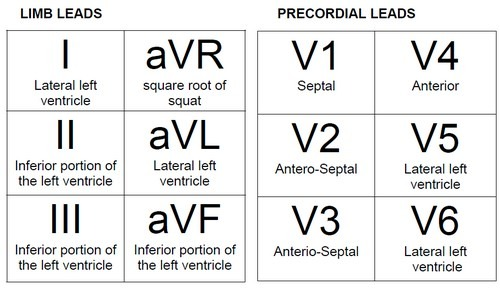
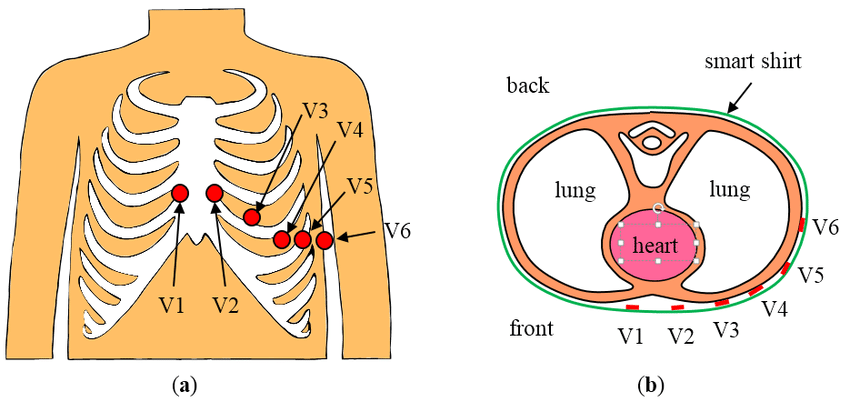
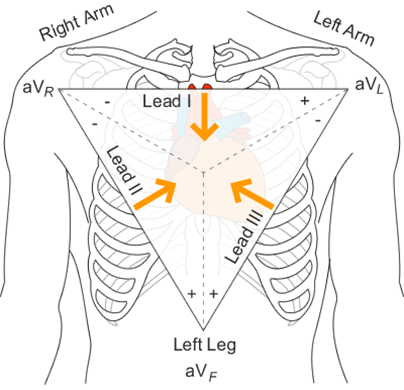

In [49]:
# rename columns and drop duplicates
out_df.columns= ['index', 'I', 'II', 'III', 'aVF', 'aVR', 'aVL', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
out_df['index'] = out_df['index'].astype('int32')
out_df = out_df.drop_duplicates()
out_df

,index,I,II,III,aVF,aVR,aVL,V1,V2,V3,V4,V5,V6
0,0,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.210,-0.145,-0.080
4,0,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.211,-0.146,-0.080
6,0,-0.005,0.131,0.136,-0.063,-0.070,0.133,-0.125,-0.082,-0.102,-0.190,-0.129,-0.072
7,0,-0.005,0.130,0.135,-0.063,-0.070,0.132,-0.122,-0.077,-0.094,-0.172,-0.116,-0.067
8,0,-0.005,0.128,0.133,-0.062,-0.069,0.130,-0.119,-0.071,-0.084,-0.157,-0.102,-0.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499595,6427,0.010,0.170,0.160,-0.090,-0.075,0.165,0.155,0.365,0.230,0.030,-0.065,-0.060
4499596,6427,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.368,0.245,0.029,-0.057,-0.056
4499597,6427,0.016,0.176,0.160,-0.096,-0.073,0.167,0.155,0.383,0.261,0.040,-0.052,-0.055
4499598,6427,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.406,0.282,0.059,-0.046,-0.053


In [50]:
# read in csv file
df = pd.read_csv('data/training_13_features.csv')
label_df = df.copy()
label_df['unique_id'] = np.arange(label_df.shape[0])
label_df

,ritmi,age,sex,height,weight,nurse,site,device,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold,unique_id
0,2,54.0,0,166.796356,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6,0
1,1,54.0,0,166.796356,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6,1
2,0,55.0,0,166.796356,69.841845,1.0,2.0,1,1.0,1.0,0,1,0.0,10,2
3,2,29.0,1,164.000000,56.000000,7.0,1.0,10,0.0,0.0,0,1,0.0,1,3
4,2,57.0,0,166.796356,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,2,81.0,0,178.000000,70.000000,11.0,1.0,4,1.0,0.0,0,1,0.0,4,6423
6424,2,88.0,0,152.000000,45.000000,11.0,1.0,4,0.0,0.0,0,1,0.0,10,6424
6425,0,83.0,1,166.796356,69.841845,1.0,2.0,1,1.0,1.0,0,1,0.0,5,6425
6426,1,75.0,1,177.000000,80.000000,0.0,34.0,2,0.0,2.0,0,1,0.0,7,6426


In [51]:
# merge out_df and label_df 
merged_df = pd.merge(out_df, label_df, how='inner', left_on='index', right_on='unique_id')
merged_df = merged_df.drop(columns=['index', 'unique_id'])
merged_df

,I,II,III,aVF,aVR,aVL,V1,V2,V3,V4,...,weight,nurse,site,device,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
0,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.210,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
1,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.211,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
2,-0.005,0.131,0.136,-0.063,-0.070,0.133,-0.125,-0.082,-0.102,-0.190,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
3,-0.005,0.130,0.135,-0.063,-0.070,0.132,-0.122,-0.077,-0.094,-0.172,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
4,-0.005,0.128,0.133,-0.062,-0.069,0.130,-0.119,-0.071,-0.084,-0.157,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361838,0.010,0.170,0.160,-0.090,-0.075,0.165,0.155,0.365,0.230,0.030,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4361839,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.368,0.245,0.029,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4361840,0.016,0.176,0.160,-0.096,-0.073,0.167,0.155,0.383,0.261,0.040,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4361841,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.406,0.282,0.059,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8


In [52]:
# dropna and reset index
new_mdf = merged_df.dropna()
new_mdf = new_mdf.reset_index(drop=True)
new_mdf

,I,II,III,aVF,aVR,aVL,V1,V2,V3,V4,...,weight,nurse,site,device,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
0,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.210,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
1,-0.005,0.135,0.140,-0.065,-0.073,0.137,-0.125,-0.090,-0.110,-0.211,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
2,-0.005,0.131,0.136,-0.063,-0.070,0.133,-0.125,-0.082,-0.102,-0.190,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
3,-0.005,0.130,0.135,-0.063,-0.070,0.132,-0.122,-0.077,-0.094,-0.172,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
4,-0.005,0.128,0.133,-0.062,-0.069,0.130,-0.119,-0.071,-0.084,-0.157,...,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319171,0.010,0.170,0.160,-0.090,-0.075,0.165,0.155,0.365,0.230,0.030,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4319172,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.368,0.245,0.029,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4319173,0.016,0.176,0.160,-0.096,-0.073,0.167,0.155,0.383,0.261,0.040,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8
4319174,0.014,0.174,0.160,-0.094,-0.073,0.167,0.155,0.406,0.282,0.059,...,69.841845,1.0,2.0,1,3.0,1.0,0,1,0.0,8


In [53]:
# write to csv file
new_mdf.to_csv('data/training_25_features.csv', index=False)